# import libraries

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# overall lib check

In [2]:
# no seasalt & dust
gamma_pop_nsd = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sce = int(filename[-29:-27])
            if (ncf.variables["gamma_pop_pr"].shape[0] != 49):
                print("not enough data in out", sce)
                pass
            else:
                gamma_pop_nsd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
                gamma_pop_nsd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
                time = ncf.variables["time"].data/3600

gamma_pop_nsd_error = (gamma_pop_nsd[1,:,:].ravel() - 
               gamma_pop_nsd[0,:,:].ravel())/gamma_pop_nsd[0,:,:].ravel()    

d_wds = {"gamma_pop_ref": gamma_pop_nsd[0,:,:].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_nsd[1,:,:].ravel(),
         "gamma_pop_error": gamma_pop_nsd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_wds= pd.DataFrame(data=d_wds)
print(df_wds.shape)

df_wds_2ndngt = df_wds[((df_wds.index.values % 49) >=37) & ((df_wds.index.values % 49) <= 48)]
print(df_wds_2ndngt.shape)

df2 = df_wds_2ndngt.dropna()
print(df2.shape)
null_data = df_wds_2ndngt[df_wds_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df3 = df_wds.dropna()
print(df3.shape)

not enough data in out 78
not enough data in out 46
(4900, 3)
(1200, 3)
(510, 3)
[ 0  0  0  0  0  0  0  0  0  0  0  0  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18
 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20
 21 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22
 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 25 25
 26 26 26 27 27 27 27 27 30 30 30 30 30 30 30 30 30 30 30 30 31 31 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 33 33 33 33
 33 33 33 33 33 33 33 33 36 36 36 36 36 36 36 36 36 36 36 36 38 38 38 38
 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39 39 39 40 40 40 40
 40 40 40 40 40 40 40 40 41 41 41 41 41 41 

# lib error check: sce 36

In [3]:
gamma_pop = np.zeros((2,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0036'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sce = int(filename[-29:-27])
            if (ncf.variables["gamma_pop_pr"].shape[0] != 49):
                print(sce)
                pass
            else:
                gamma_pop[0, :] = ncf.variables["gamma_pop_pr"].data
                gamma_pop[1, :] = ncf.variables["gamma_pop_comp"].data
                time = ncf.variables["time"].data/3600

gamma_pop_error = (gamma_pop[1,:].ravel() - 
               gamma_pop[0,:].ravel())/gamma_pop[0,:].ravel()    

d_wds = {"gamma_pop_ref": gamma_pop[0, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_wds= pd.DataFrame(data=d_wds)
print(df_wds.shape)

df_wds_2ndngt = df_wds[((df_wds.index.values % 49) >=37) & ((df_wds.index.values % 49) <= 48)]
print(df_wds_2ndngt.shape)

df2 = df_wds_2ndngt.dropna()
print(df2.shape)
null_data = df_wds_2ndngt[df_wds_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df3 = df_wds.dropna()
print(df3.shape)

(49, 3)
(12, 3)
(0, 3)
[0 0 0 0 0 0 0 0 0 0 0 0]
[37 38 39 40 41 42 43 44 45 46 47 48]
(12, 3)
(12, 3)


## env

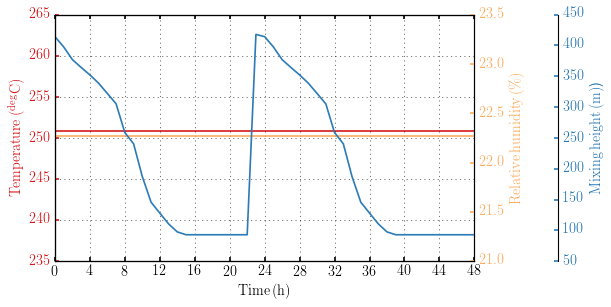

In [4]:
f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0036/out/urban_plume_0001_env.txt'
df_env = pd.read_csv(f,header=None,sep='\s+') # time, temperature, RH, pressure, mixing height
# print(df_env.shape)
# print(df_env)
# print(df_env.iloc[:,0])

from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(8,4))

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines['right'].set_position(("axes", 1.2))

time = df_env.iloc[:,0]/3600
# print(len(time))
temp = df_env.iloc[:,1]
rh = df_env.iloc[:,2]*100
mxh = df_env.iloc[:,4]

p1 = ax.plot(time, temp, color = "#d7191c", ls = '-', lw = 1.5)
p2 = twin1.plot(time, rh, color = "#fdae61", ls = '-', lw = 1.5)
p3 = twin2.plot(time, mxh, color = "#2c7bb6", ls = '-', lw = 1.5)

ax.set_xlabel(r'$\rm Time\,(h)$')
ax.set_ylabel(r'$\rm Temperature\,(^{\deg}C)$')
twin1.set_ylabel(r'$\rm Relative\,humidity\,(\%)$')
twin2.set_ylabel(r'$\rm Mixing\,height\,(m)$)')

ax.yaxis.label.set_color('#d7191c')
twin1.yaxis.label.set_color('#fdae61')
twin2.yaxis.label.set_color('#2c7bb6')

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#d7191c', **tkw)
twin1.tick_params(axis='y', colors='#fdae61', **tkw)
twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
ax.tick_params(axis='x', **tkw)

ax.set_xlim(0,48)
ax.set_xticks(np.arange(0,len(time),4))
ax.grid()
# ax.text(40.5, 292, r'$\rm sce:%d$'% (10))

plt.tight_layout(pad=1.0)

## comp

### bulk

In [5]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
# print(len(s))
# print('bulk_'+ s[11] + '_masses')

# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0036'
bulk_masses = np.zeros((14,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(11):
                    bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[12, :] = ncf.variables['tot_wetmass_conc'].data * 1e9
                    bulk_masses[13, :] = ncf.variables['tot_drymass_conc'].data * 1e9
# print(bulk_masses[12,:])
# print(bulk_masses[13,:])
d_bulkmass = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
                'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
                'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
                'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
                'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
                'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
                'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
                'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
                'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
                'bulk_'+ s[9] + '_masses': bulk_masses[9,:].ravel(),
                'bulk_'+ s[10] + '_masses': bulk_masses[10,:].ravel(),
                'bulk_'+ s[11] + '_masses': bulk_masses[11,:].ravel(),
                'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_bulkmass = pd.DataFrame(data=d_bulkmass)
print(df_bulkmass.shape)
df_bulkmass_2ndngt = df_bulkmass[((df_bulkmass.index.values % 49) >= 37) & ((df_bulkmass.index.values % 49) <= 48)]  # ngt: night
print(df_bulkmass_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[12,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[12,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[12,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[12,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[12,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[12,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[12,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[12,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[12,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[12,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[12,:].ravel())
h2o = sum(bulk_masses[11,:].ravel())/sum(bulk_masses[12,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print('h2o', h2o)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3+h2o)

(49, 13)
(12, 13)
no3: 0.46966097216697406
so4: 0.000547765894097529
oc: 0.005496891047190965
soa: 0.01928920327091112
nh4: 0.1515786846856717
na: 0.0
cl: 0.029624910055225783
bc: 0.0679727826364753
oin: 0.2558277110993471
ca: 0.0
co3: 0.0
h2o 0.0
0.9999989208558937


### dist

In [6]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
# print(s)
# print('bulk_'+ s[0] + '_masses')

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0036'
nmass_frac_dist = np.zeros((12,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(12):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

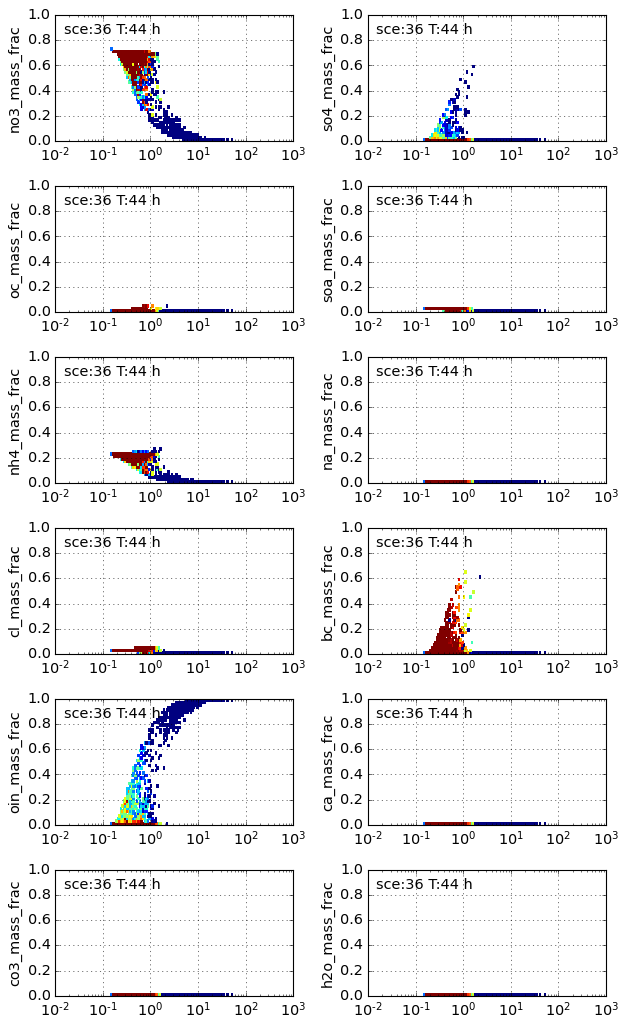

In [8]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(8,13))

X, Y = np.meshgrid(diam_edges, bc_edges)

time = 44

for i in range(12):
    plt.subplot(6,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,time,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel(s[i] + "_mass_frac")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (36, time))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

# gamma_pop from different libraries test

In [5]:
# include seasalt & dust, 2d simulation
gamma_pop = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            time = ncf.variables["time"].data/3600

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/2_comp_avg/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()

d_gamma = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # wsd: with seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_gamma = pd.DataFrame(data=d_gamma)
print(df_gamma.shape)

df_gamma_2ndngt = df_gamma[((df_gamma.index.values % 49) >= 37) & ((df_gamma.index.values % 49) <= 48)]
print(df_gamma_2ndngt.shape)

df1 = df_gamma_2ndngt.dropna()
print(df1.shape)

(4900, 3)
(1200, 3)
(1200, 3)


In [19]:
case_index = df_gamma_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

df_on = df_gamma_2ndngt[((np.abs(df_gamma_2ndngt["gamma_pop_error"])) <= 1)]
df_above = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) > 20)]
df_below = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) < -20)]

## below

In [4]:
# print(df_below.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_below.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_below.shape)
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)

[55 55 55 55 55 55 55 55 55 55 55 55 17 17 17 17 17 17 17 17 17 17 17 17
 82 82 82 82 56 56 56 82 82 56 56 56 82 82 56 56 56 82 79 82 56 23 79 56
 79 79 79 79 82 79 35 23 79 59 35 35 56 79 35 79 95 82 95 35 95 79 95 41
 23 95 95 79 35 95 95 35 23 95 41 35 95 95 42 42 35 59 23 41 42 95 35 42
 54 54 54 42 54 54 23 41 35 54 42 54 54 54 42 54 54 54 41 35 59 42 41 41
 41 23 41 42 41 41 41 21 21 21 42 21 59 21 21 23 21 24 21 24 42 59 24 24
 28 24 28 59 21 28 42 24 23 28 24 28 28 28 28 59 28 28 24 21 59 59 59 59
 59 28 28 24 21 21 23 24  7 20 20 20 23 20 24 20 20 20 61 20 20 20 23 61
 20 99 24 61 20 99 61 94 94  7 94 61 94 99 94 61 61 94 51  5 51 51  5 51
 61 61  5 51 61 94 51 99  5 94  5  2  2 61 94  2  5 61 38 38 36  2  9 38
 51 36 30 38 57 36 94 57  9 57  2  5  9 57 38  9  9  9  9 36  9 57  9  9
 36 99  5  9 36 36 36 38  5 85  5 36 57 38 85  5 57 36 36  5 85  2 51  9
 85 36 51 38 30 94 51 85 33 33 57 85 33 33 33 33  2 33 99 38 51 33 33 33
 85 51 33 40 33 30 40 57  7 85 40 40 40 40 40 57 99

## on

In [20]:
# print(df_on.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_on.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_on.shape)
# pd.set_option('display.max_columns', df_wsd.shape[0]+1)

[80 91 89 58 73  6 58 58 67 58  6 58 89 58 58 58 89 58 58 58 50  6 90 67
 12 90 52  6  6 84  6 90 84 80 67 84 90 50 84]
[43 37 43 38 40 37 48 39 41 47 39 46 46 40 45 44 45 43 41 42 39 38 39 40
 39 40 48 40 42 48 41 41 37 42 39 47 42 40 38]
(39, 3)


## above

In [6]:
# print(df_above.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_above.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_above.shape)

[ 8 52 93 52 11 52  4 86  8 93 11 19  4  4  4  4 11 11 11 11 11 11  8 11
 11 11  4 93  8 86 19 11  4  4 70  4 70  4  4  4 70 70 70 70 70 70 70 86
 70 70 70 64 64 64 15 86 64 86 64 15 64 64 64 86 64 15 64 64 64 15 31 31
 31 31 15 15 31 15 31 15 15 15 31 15 31 15 31 31 31 31 88 88 88 88 88 88
 88 88 88 88 88 88 87 87 87 87 87 87 87 87 87 87 87 87]
[40 39 39 38 37 37 48 42 39 38 38 38 47 46 45 44 39 48 44 45 43 42 38 40
 41 47 43 37 37 41 37 46 42 41 37 40 38 39 37 38 42 41 44 39 45 43 46 40
 40 48 47 38 37 39 37 39 40 38 41 38 42 43 48 37 46 39 45 44 47 40 48 46
 47 45 41 42 44 43 43 44 45 46 42 47 41 48 40 39 38 37 48 47 46 39 38 40
 45 37 41 43 44 42 37 38 39 40 41 42 43 44 45 46 48 47]
(114, 3)


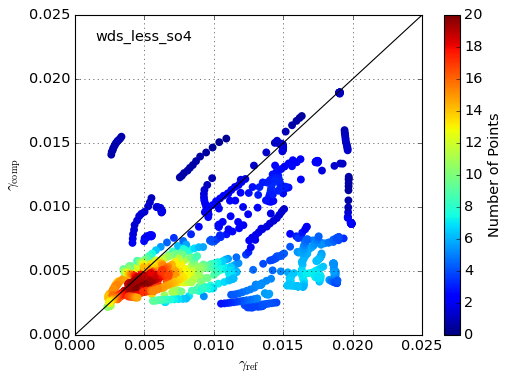

In [9]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13

plt.figure(figsize=(7,5))
###################
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=20)
cbar = plt.colorbar()
cbar.set_label('Number of Points')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'wds_less_so4')
plt.grid()
# plt.savefig('gamma_pop_comparison.pdf')

# size distribution of gamma, m, S

In [3]:
h1 = np.zeros((2,100,49,180)) # gamma * surf_dist
h2 = np.zeros((2,100,49,180)) # surf_area_dist
hgamma = np.zeros((2,100,49,180))
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180))
num_dist = np.zeros((2,100,49,180))
no3_dist = np.zeros((2,100,49,180))
so4_dist = np.zeros((2,100,49,180))
wi_dist = np.zeros((2,100,49,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[0,sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2[0,sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma[0,sce_index, t_index,:] = h1[0,sce_index, t_index,:]/h2[0,sce_index, t_index,:]
            surf_area_dist[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            mass_dist[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e12 # kg to ng
            num_dist[0,sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[0,sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[0,sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[0,sce_index,t_index,:] = so4_dist[0,sce_index,t_index,:]/(so4_dist[0,sce_index,t_index,:]+no3_dist[0,sce_index,t_index,:])

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/2_comp_avg/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[1,sce_index, t_index,:] = ncf.variables["gamma_surf_avg"].data*1e6 # m-3 to cm-3
            h2[1,sce_index, t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6 # m-3 to cm-3
            hgamma[1,sce_index, t_index,:] = h1[1,sce_index, t_index,:]/h2[1,sce_index, t_index,:]
            surf_area_dist[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6
            mass_dist[1,sce_index,t_index,:] = ncf.variables["mass_dist_avg"].data*1e9 # kg to µg
            num_dist[1,sce_index,t_index,:] = ncf.variables["num_dist_avg"].data*1e6 # m-3 to cm-3
            no3_dist[1,sce_index,t_index,:] = ncf.variables["mass_no3_dist_avg"].data*1e9
            so4_dist[1,sce_index,t_index,:] = ncf.variables["mass_so4_dist_avg"].data*1e9
            wi_dist[1,sce_index,t_index,:] = so4_dist[1,sce_index,t_index,:]/(so4_dist[1,sce_index,t_index,:]+no3_dist[1,sce_index,t_index,:])

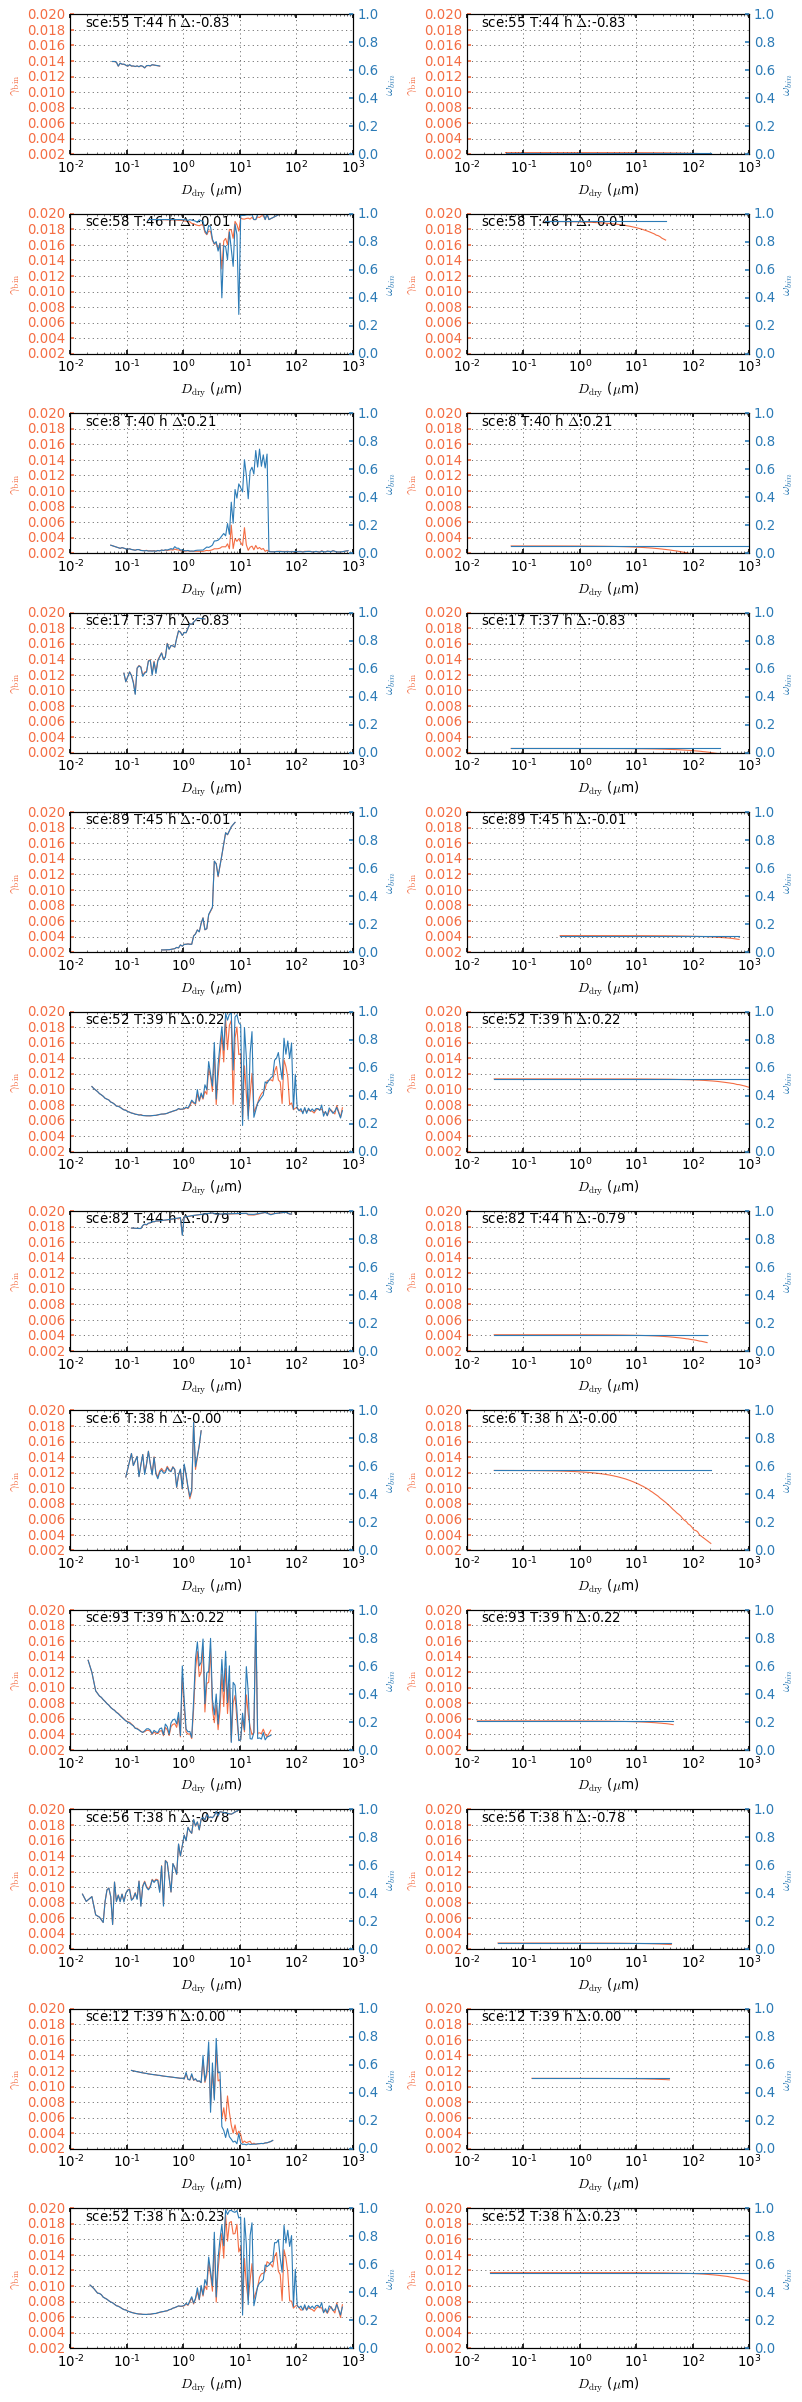

In [6]:
fig, ax = plt.subplots(12,2,figsize=(10,30))
fig.subplots_adjust(right=0.75)

sce_index = [55,58,8,17,89,52,82,6,93,56,12,52]
t_index = [44,46,40,37,45,39,44,38,39,38,39,38]

for i in range(12):
    # twin1 = ax[i,0].twinx()
    # # twin2 = ax[i,0].twinx()
    twin3 = ax[i,0].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    # twin2.spines['right'].set_position(("axes", 1.2))
    # twin3.spines['right'].set_position(("axes", 1.2))

    y = hgamma[0,sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[0,sce_index[i], t_index[i],:])

    w = wi_dist[0,sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[0,sce_index[i], t_index[i], :])

    p1 = ax[i,0].plot(diam[ym], y[ym], color = "#f46d43", ls = '-', lw = 1)
    # p2 = twin1.plot(diam, mass_dist[0,sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    # p3 = twin2.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)
    p4 = twin3.plot(diam[wm], w[wm], color = "#2c7bb6", ls = '-', lw = 1)

    ax[i,0].set_xscale('log')
    ax[i,0].set_xlim(1e-2, 1e3)
    ax[i,0].set_ylim(0.002,0.02)
    twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i,0].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i,0].set_ylabel(r'$\rm \gamma_{bin}$')
    # twin1.set_ylabel(r'Mass ($\rm ng$)')
    # twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i,0].yaxis.label.set_color('#f46d43')
    # twin1.yaxis.label.set_color('#fdae61')
    # twin2.yaxis.label.set_color('#2c7bb6')
    twin3.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i,0].tick_params(axis='y', colors='#f46d43', **tkw)
    # twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    # twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    twin3.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i,0].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]].ravel() - gamma_pop[0,sce_index[i],t_index[i]].ravel())/gamma_pop[0,sce_index[i],t_index[i]].ravel()
    ax[i,0].grid()
    ax[i,0].text(0.018, 0.0185, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

for i in range(12):
    # twin1 = ax[i,1].twinx()
    # twin2 = ax[i,1].twinx()
    twin3 = ax[i,1].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    # twin2.spines['right'].set_position(("axes", 1.2))
    # twin3.spines['right'].set_position(("axes", 1.2))

    y1 = hgamma[1,sce_index[i], t_index[i],:]
    ym1 = np.isfinite(hgamma[1,sce_index[i], t_index[i],:])

    w1 = wi_dist[1,sce_index[i], t_index[i], :]
    wm1 = np.isfinite(wi_dist[1,sce_index[i], t_index[i], :])

    p1 = ax[i,1].plot(diam[ym1], y1[ym1], color = "#f46d43", ls = '-', lw = 1)
    # p2 = twin1.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    # p3 = twin2.plot(diam, surf_area_dist[1,sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)
    p4 = twin3.plot(diam[wm1], w1[wm1], color = "#2c7bb6", ls = '-', lw = 1)

    ax[i,1].set_xscale('log')
    ax[i,1].set_xlim(1e-2, 1e3)
    ax[i,1].set_ylim(0.002,0.02)
    twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i,1].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i,1].set_ylabel(r'$\rm \gamma_{bin}$')
    # twin1.set_ylabel(r'Mass ($\rm ng$)')
    # twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i,1].yaxis.label.set_color('#f46d43')
    # twin1.yaxis.label.set_color('#fdae61')
    # twin2.yaxis.label.set_color('#2c7bb6')
    twin3.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i,1].tick_params(axis='y', colors='#f46d43', **tkw)
    # twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    # twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    twin3.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i,1].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]] - gamma_pop[0,sce_index[i],t_index[i]])/gamma_pop[0,sce_index[i],t_index[i]]
    ax[i,1].grid()
    ax[i,1].text(0.018, 0.0185, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

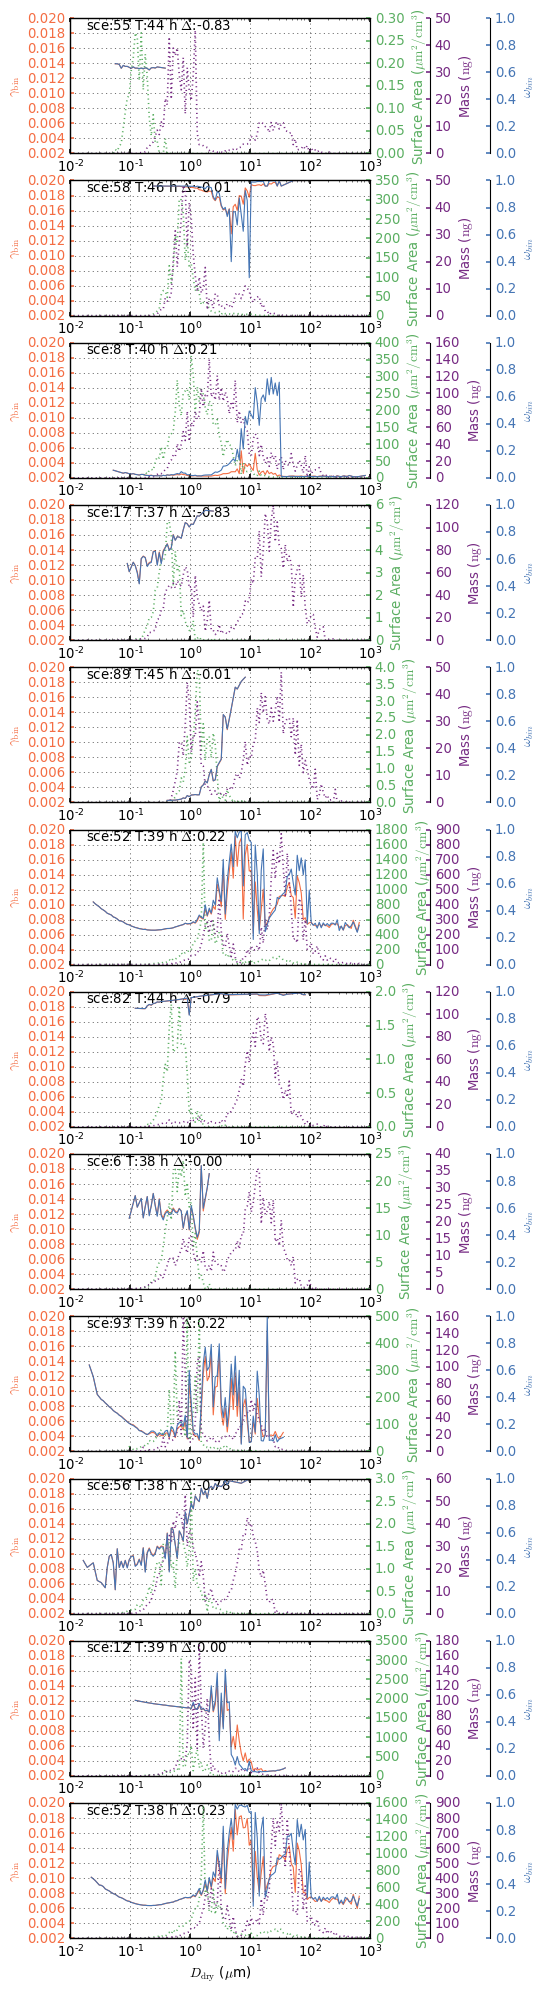

In [7]:
fig, ax = plt.subplots(12,figsize=(6,30))
fig.subplots_adjust(right=0.75)

sce_index = [55,58,8,17,89,52,82,6,93,56,12,52]
t_index = [44,46,40,37,45,39,44,38,39,38,39,38]

for i in range(12):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    twin3.spines['right'].set_position(("axes", 1.4))

    y = hgamma[0,sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[0,sce_index[i], t_index[i],:])

    w = wi_dist[0,sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[0,sce_index[i], t_index[i], :])

    p1 = ax[i].plot(diam[ym], y[ym], color = "#f46d43", ls = '-', lw = 1)
    p2 = twin1.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "#5aae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "#762a83", ls = ':', lw = 1.5)
    p4 = twin3.plot(diam[wm], w[wm], color = "#4575b4", ls = '-', lw = 1)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e3)
    ax[i].set_ylim(0.002,0.02)
    twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$') 
    twin1.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin2.set_ylabel(r'Mass ($\rm ng$)')
    twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i].yaxis.label.set_color('#f46d43')
    twin1.yaxis.label.set_color('#5aae61')
    twin2.yaxis.label.set_color('#762a83')
    twin3.yaxis.label.set_color('#4575b4')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#f46d43', **tkw)
    twin1.tick_params(axis='y', colors='#5aae61', **tkw)
    twin2.tick_params(axis='y', colors='#762a83', **tkw)
    twin3.tick_params(axis='y', colors='#4575b4', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]] - gamma_pop[0,sce_index[i],t_index[i]])/gamma_pop[0,sce_index[i],t_index[i]]
    ax[i].grid()
    ax[i].text(0.018, 0.0185, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

## gamma_i 2d dist

In [7]:
gamma_dist = np.zeros((2,49,50,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/1_part_res/scenarios/scenario_0055'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            # print(nsce_index)
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            gamma_edges = ncf.variables["gamma_edges"].data
            gamma_dist[0, t_index,:,:] = ncf.variables["diam_gamma_dist_pr"].data

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/2_comp_avg/scenarios/scenario_0055'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            gamma_edges = ncf.variables["gamma_edges"].data
            gamma_dist[1, t_index,:,:] = ncf.variables["diam_gamma_dist_avg"].data

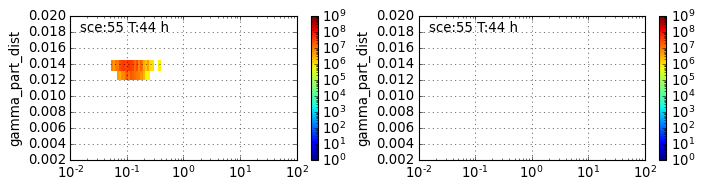

In [8]:
plt.figure(figsize=(9,2.5))
X, Y = np.meshgrid(diam_edges, gamma_edges)

sce = 55
time = 44

for i in range(2):
    plt.subplot(1,2,i+1)
    p = plt.pcolormesh (X, Y, gamma_dist[i,time,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e9), linewidths = 0.1)
    plt.colorbar()
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    plt.ylim(0.002,0.02)
    plt.ylabel("gamma_part_dist")
    plt.yscale('linear')
    plt.text(0.015, 0.018, r'sce:%d T:%d h '% (sce, time))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

## comp

### bulk

In [6]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
# print(len(s))
# print('bulk_'+ s[11] + '_masses')

# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/1_part_res/scenarios/scenario_0055'
bulk_masses = np.zeros((14,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(11):
                    bulk_masses[i,:,:] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[12,:,:] = ncf.variables['tot_wetmass_conc'].data * 1e9
                    bulk_masses[13,:,:] = ncf.variables['tot_drymass_conc'].data * 1e9
# print(bulk_masses[12,:])
# print(bulk_masses[13,:])
d1_bulkmass = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
                'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
                'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
                'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
                'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
                'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
                'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
                'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
                'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
                'bulk_'+ s[9] + '_masses': bulk_masses[9,:,:].ravel(),
                'bulk_'+ s[10] + '_masses': bulk_masses[10,:,:].ravel(),
                'bulk_'+ s[11] + '_masses': bulk_masses[11,:,:].ravel(),
                'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df1_bulkmass = pd.DataFrame(data=d1_bulkmass)
print(df1_bulkmass.shape)
df1_bulkmass_2ndngt = df1_bulkmass[((df1_bulkmass.index.values % 49) >= 37) & ((df1_bulkmass.index.values % 49) <= 48)]  # ngt: night
print(df1_bulkmass_2ndngt.shape)

no3 = sum(bulk_masses[0,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
so4 = sum(bulk_masses[1,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
oc = sum(bulk_masses[2,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
soa = sum(bulk_masses[3,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
nh4 = sum(bulk_masses[4,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
na = sum(bulk_masses[5,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
cl = sum(bulk_masses[6,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
bc = sum(bulk_masses[7,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
oin = sum(bulk_masses[8,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
ca = sum(bulk_masses[9,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
co3 = sum(bulk_masses[10,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
h2o = sum(bulk_masses[11,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print('h2o', h2o)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3+h2o)

(4900, 13)
(1200, 13)
no3: 0.34152157667251903
so4: 0.004247579470328888
oc: 0.010810965824594369
soa: 0.02072405172760465
nh4: 0.09765415168617385
na: 0.004688685051789834
cl: 0.0009133946989174051
bc: 0.00011224977272836154
oin: 0.5186616224808451
ca: 0.0
co3: 0.0
h2o 0.0
0.9993342773855014


In [7]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
# print(len(s))
# print('bulk_'+ s[11] + '_masses')

# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/2_comp_avg/scenarios/scenario_0055'
bulk_masses = np.zeros((14,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(11):
                    bulk_masses[i,:,:] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[12,:,:] = ncf.variables['tot_wetmass_conc'].data * 1e9
                    bulk_masses[13,:,:] = ncf.variables['tot_drymass_conc'].data * 1e9
# print(bulk_masses[12,:])
# print(bulk_masses[13,:])
d2_bulkmass = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
                'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
                'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
                'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
                'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
                'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
                'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
                'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
                'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
                'bulk_'+ s[9] + '_masses': bulk_masses[9,:,:].ravel(),
                'bulk_'+ s[10] + '_masses': bulk_masses[10,:,:].ravel(),
                'bulk_'+ s[11] + '_masses': bulk_masses[11,:,:].ravel(),
                'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df2_bulkmass = pd.DataFrame(data=d2_bulkmass)
print(df2_bulkmass.shape)
df2_bulkmass_2ndngt = df2_bulkmass[((df2_bulkmass.index.values % 49) >= 37) & ((df2_bulkmass.index.values % 49) <= 48)]  # ngt: night
print(df2_bulkmass_2ndngt.shape)

no3 = sum(bulk_masses[0,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
so4 = sum(bulk_masses[1,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
oc = sum(bulk_masses[2,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
soa = sum(bulk_masses[3,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
nh4 = sum(bulk_masses[4,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
na = sum(bulk_masses[5,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
cl = sum(bulk_masses[6,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
bc = sum(bulk_masses[7,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
oin = sum(bulk_masses[8,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
ca = sum(bulk_masses[9,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
co3 = sum(bulk_masses[10,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
h2o = sum(bulk_masses[11,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print('h2o', h2o)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3+h2o)

(4900, 13)
(1200, 13)
no3: 0.3669553287556756
so4: 0.004039094974974288
oc: 0.010288383513278213
soa: 0.020090914134692855
nh4: 0.10501333933007044
na: 0.004419472485430263
cl: 0.000617514494701728
bc: 0.00010718680711893951
oin: 0.4878566796041407
ca: 0.0
co3: 0.0
h2o 0.0
0.999387914100083


In [14]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
# print(len(s))
# print('bulk_'+ s[11] + '_masses')

# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/0_hydr_noo/scenarios'
bulk_masses = np.zeros((14,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(11):
                    bulk_masses[i,:,:] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[12,:,:] = ncf.variables['tot_wetmass_conc'].data * 1e9
                    bulk_masses[13,:,:] = ncf.variables['tot_drymass_conc'].data * 1e9
# print(bulk_masses[12,:])
# print(bulk_masses[13,:])
d0_bulkmass = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
                'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
                'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
                'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
                'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
                'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
                'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
                'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
                'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
                'bulk_'+ s[9] + '_masses': bulk_masses[9,:,:].ravel(),
                'bulk_'+ s[10] + '_masses': bulk_masses[10,:,:].ravel(),
                'bulk_'+ s[11] + '_masses': bulk_masses[11,:,:].ravel(),
                'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df0_bulkmass = pd.DataFrame(data=d0_bulkmass)
print(df0_bulkmass.shape)
df0_bulkmass_2ndngt = df0_bulkmass[((df0_bulkmass.index.values % 49) >= 37) & ((df0_bulkmass.index.values % 49) <= 48)]  # ngt: night
print(df0_bulkmass_2ndngt.shape)

no3 = sum(bulk_masses[0,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
so4 = sum(bulk_masses[1,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
oc = sum(bulk_masses[2,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
soa = sum(bulk_masses[3,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
nh4 = sum(bulk_masses[4,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
na = sum(bulk_masses[5,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
cl = sum(bulk_masses[6,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
bc = sum(bulk_masses[7,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
oin = sum(bulk_masses[8,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
ca = sum(bulk_masses[9,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
co3 = sum(bulk_masses[10,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())
h2o = sum(bulk_masses[11,:,:].ravel())/sum(bulk_masses[12,:,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print('h2o', h2o)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3+h2o)

(4900, 13)
(1200, 13)
no3: 0.07600815319578764
so4: 0.037005153938431
oc: 0.015267043302859749
soa: 0.01766403642914269
nh4: 0.02797433438107836
na: 0.025245030665936013
cl: 0.023826917775217105
bc: 4.649629862892858e-06
oin: 0.7410442285775981
ca: 0.0
co3: 0.0
h2o 0.0
0.9640395478959135


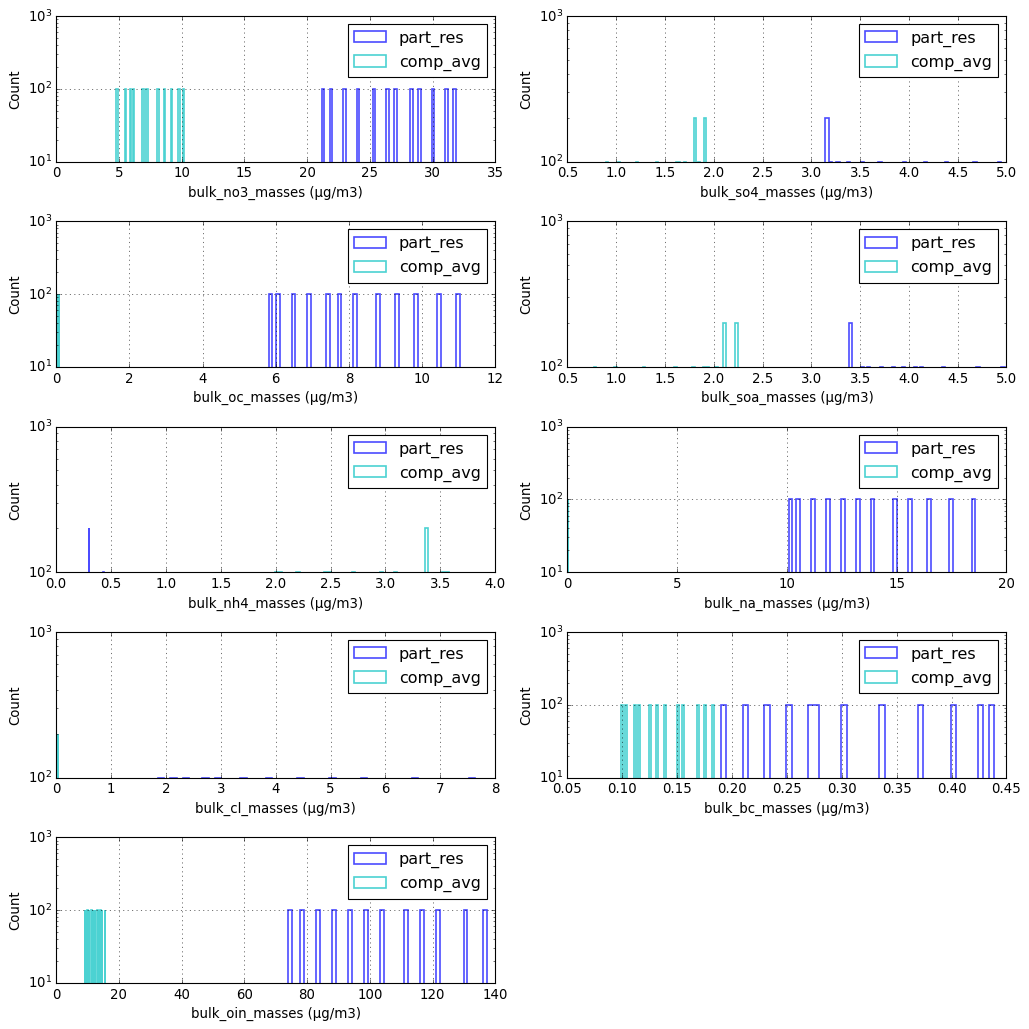

In [11]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    # plt.hist(data = df0_bulkmass_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'g', alpha=0.7, histtype = 'step', label = 'hydr_noo', lw = 1.5)
    plt.hist(data = df1_bulkmass_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'b', alpha=0.7, histtype = 'step', label = 'part_res', lw = 1.5)
    plt.hist(data = df2_bulkmass_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'c', alpha=0.7, histtype = 'step', label = 'comp_avg', lw = 1.5)

    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    # plt.xscale('LOG')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
    plt.tight_layout(pad = 1.0)
    # plt.savefig('parameter_space.pdf')

### dist

In [3]:
s = pd.Series(['no3','so4','oin','na','cl','oc','soa','bc','nh4','h2o'])
# print(s)

nmass_frac_dist = np.zeros((2,10,49,50,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/1_part_res/scenarios/scenario_0055'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            # print(nsce_index)
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[0, i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4_less/2_comp_avg/scenarios/scenario_0055'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[1, i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_avg"].data * 1e-6

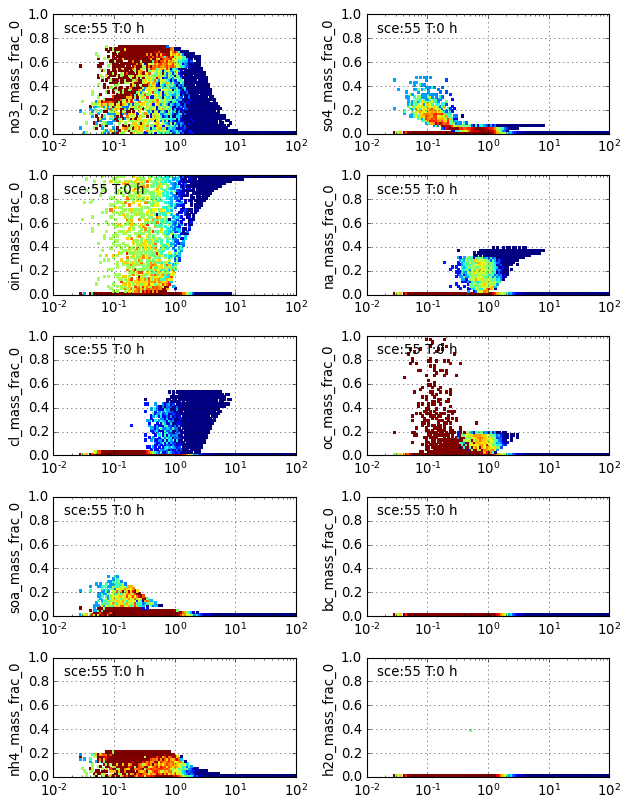

In [4]:
plt.figure(figsize=(8,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[0,i,0,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel(s[i] + "_mass_frac_0")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (55,0))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

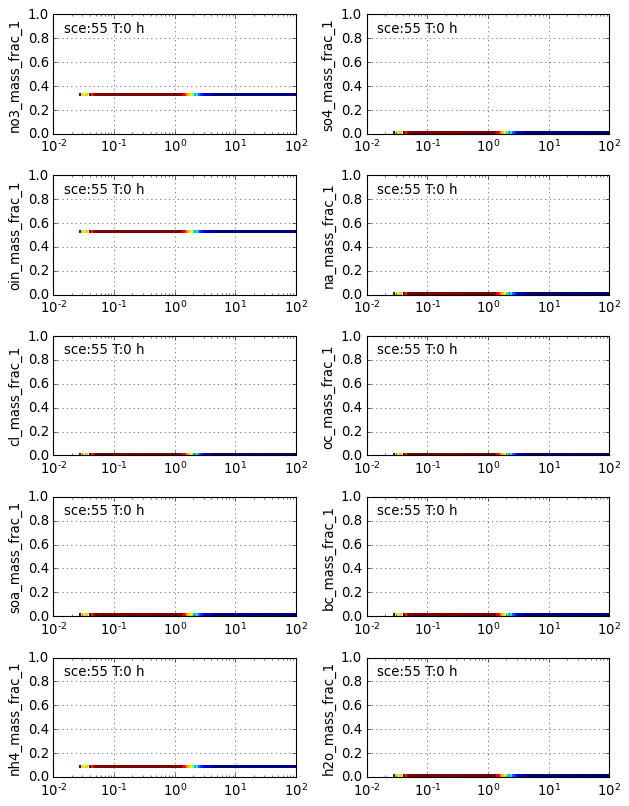

In [5]:
plt.figure(figsize=(8,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[1,i,0,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    # plt.ylim(0,1)
    plt.ylabel(s[i] + "_mass_frac_1")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (55, 0))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

# New libraries

In [39]:
# no seasalt & dust
gamma_pop_nd = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/0_hydr_noo/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_nd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_nd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

gamma_pop_nd_error = (gamma_pop_nd[1,:,:].ravel() - 
               gamma_pop_nd[0,:,:].ravel())/gamma_pop_nd[0,:,:].ravel()    

d_nd = {"gamma_pop_ref": gamma_pop_nd[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_nd[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_nd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_nd = pd.DataFrame(data=d_nd)
print(df_nd.shape)

df_nd_2ndngt = df_nd[((df_nd.index.values % 49) >= 37) & ((df_nd.index.values % 49) <= 48)]  # ngt: night
print(df_nd_2ndngt.shape)
# print(df_nd_2ndngt)

df1 = df_nd_2ndngt.dropna()
print(df1.shape)
null_data = df_nd_2ndngt[df_nd_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(976, 3)
[ 2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  9  9  9  9  9  9  9  9  9  9  9  9 14 14 14 14 14 14 14 14 14 14 14 14
 18 18 18 18 18 18 18 18 18 18 18 18 26 26 26 26 26 26 26 26 26 26 26 26
 29 29 29 29 29 29 29 29 29 29 29 29 33 33 33 33 33 33 33 33 33 33 33 33
 34 34 34 34 34 34 34 34 34 34 34 34 37 37 37 37 37 37 37 37 41 41 41 41
 41 41 41 41 41 41 41 41 56 56 56 56 56 56 56 56 56 56 56 56 67 67 67 67
 67 67 67 67 67 67 67 67 69 69 69 69 69 69 69 69 69 69 69 69 73 73 73 73
 73 73 73 73 73 73 73 73 74 74 74 74 74 74 74 74 74 74 74 74 79 79 79 79
 79 79 79 79 79 79 79 79 82 82 82 82 82 82 82 82 82 82 82 82 99 99 99 99
 99 99 99 99 99 99 99 99]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47

In [40]:
# no seasalt & dust
gamma_pop_wd = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/0_hydr_noo/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_wd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_wd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

gamma_pop_wd_error = (gamma_pop_wd[1,:,:].ravel() - 
               gamma_pop_wd[0,:,:].ravel())/gamma_pop_wd[0,:,:].ravel()    

d_wd = {"gamma_pop_ref": gamma_pop_wd[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_wd[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_wd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_wd = pd.DataFrame(data=d_wd)
print(df_wd.shape)

df_wd_2ndngt = df_wd[((df_wd.index.values % 49) >= 37) & ((df_wd.index.values % 49) <= 48)]  # ngt: night
print(df_wd_2ndngt.shape)
# print(df_wd_2ndngt)

df2 = df_wd_2ndngt.dropna()
print(df2.shape)
null_data = df_wd_2ndngt[df_wd_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(919, 3)
[ 3  3  3  3  3  3  3  3  3  3  3  3  5  5  5  5  5  5  5  5  5  5  5  5
  9  9  9  9  9  9  9  9  9  9  9  9 12 12 12 12 12 12 12 12 12 12 12 12
 15 15 15 15 15 15 15 15 15 15 15 15 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19
 23 23 23 23 23 23 23 23 23 23 23 23 27 27 27 27 27 27 27 27 27 27 27 27
 31 31 31 31 31 31 31 31 31 31 31 31 38 38 38 38 38 38 38 38 38 38 38 38
 39 39 39 39 39 39 39 39 39 39 39 39 42 42 42 42 42 42 42 42 42 42 42 42
 43 43 43 43 43 43 43 43 43 43 43 43 47 47 47 47 47 47 47 47 47 47 47 47
 48 48 48 50 50 51 51 51 51 51 51 51 51 51 51 51 51 59 59 59 59 59 59 59
 59 59 59 59 59 77 77 77 77 77 77 77 77 77 77 77 77 79 79 79 79 79 79 79
 79 79 79 79 79 82 82 82 82 82 82 82 82 82 82 82 82 97 97 97 97 97 97 97
 97 97 97 97 97 98 98 98 98 98 98 98 98 98 98 98 98]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48
 37 38 39 40 41 42 43 44 45 46 47 48 37 38

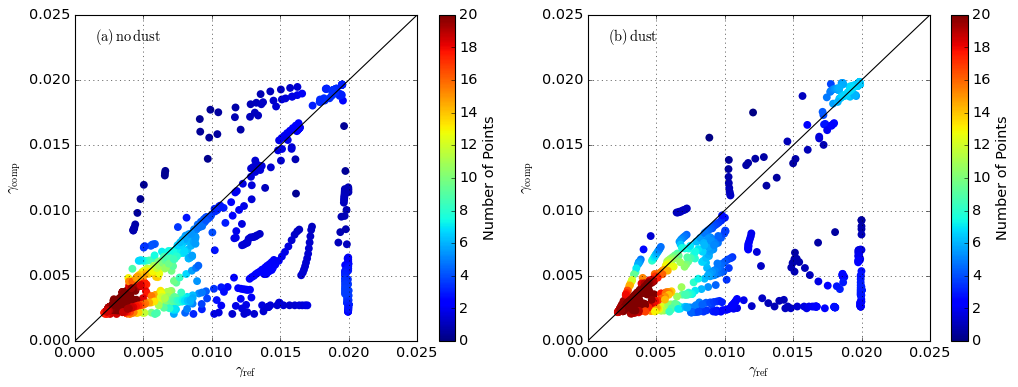

In [45]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=20)
cbar = plt.colorbar()
cbar.set_label('Number of Points')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (a)\,no\,dust$')
plt.grid()
###################
plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=20)
cbar = plt.colorbar()
cbar.set_label('Number of Points')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (b)\,dust$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')